This poject aims to find out:

Which products are selling best

What times of year perform best

Which regions or sales reps perform worst or best

Revenue trends

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('sample_sales_data.csv')
df.head()

,Order Date,Region,Sales Rep,Category,Product,Quantity,Unit Price,Sales,Profit
0,2023-03-13,East,Diana,Technology,Printer,7,1235.51,8648.54,829.04
1,2023-11-27,West,Diana,Furniture,Chair,5,86.45,432.25,38.47
2,2023-05-11,South,Alice,Office Supplies,Paper,8,173.52,1388.14,118.99
3,2023-10-21,East,Diana,Furniture,Chair,6,37.64,225.85,52.06
4,2023-11-10,East,Charlie,Office Supplies,Paper,2,99.09,198.19,19.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  200 non-null    object 
 1   Region      200 non-null    object 
 2   Sales Rep   200 non-null    object 
 3   Category    200 non-null    object 
 4   Product     200 non-null    object 
 5   Quantity    200 non-null    int64  
 6   Unit Price  200 non-null    float64
 7   Sales       200 non-null    float64
 8   Profit      200 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 14.2+ KB


In [5]:
df.describe()

,Quantity,Unit Price,Sales,Profit
count,200.000000,200.000000,200.000000,200.000000
mean,4.960000,455.190400,2269.152500,373.918950
std,2.672849,363.071069,2348.547115,400.846317
min,1.000000,11.330000,16.700000,1.150000
25%,3.000000,191.642500,605.637500,109.930000
50%,5.000000,349.435000,1564.005000,223.090000
75%,7.000000,568.825000,2882.000000,533.200000
max,9.000000,1494.710000,11636.310000,3015.330000


In [6]:
#check for missing null
df.isnull().sum()

,0
Order Date,0
Region,0
Sales Rep,0
Category,0
Product,0
Quantity,0
Unit Price,0
Sales,0
Profit,0


In [11]:
#Sales Overview
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()


print(f'Total Sales: ${total_sales:,.2f}')
print(f'Total Profit : ${total_profit:,.2f}')

Total Sales: $453,830.50
Total Sales: $453,830.50
Total Profit : $74,783.79


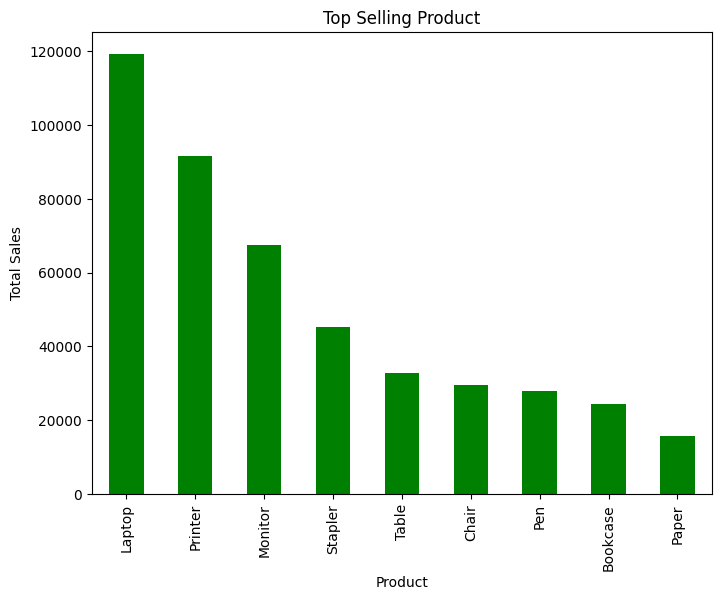

In [14]:
#Finding the top product
top_product = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
top_product.plot(kind='bar', title='Top Selling Product', color='green', figsize=(8,6))
plt.ylabel('Total Sales')
plt.show()

From our analysis, we can see that Laptops are the most purchased item and paper are the least purchased item

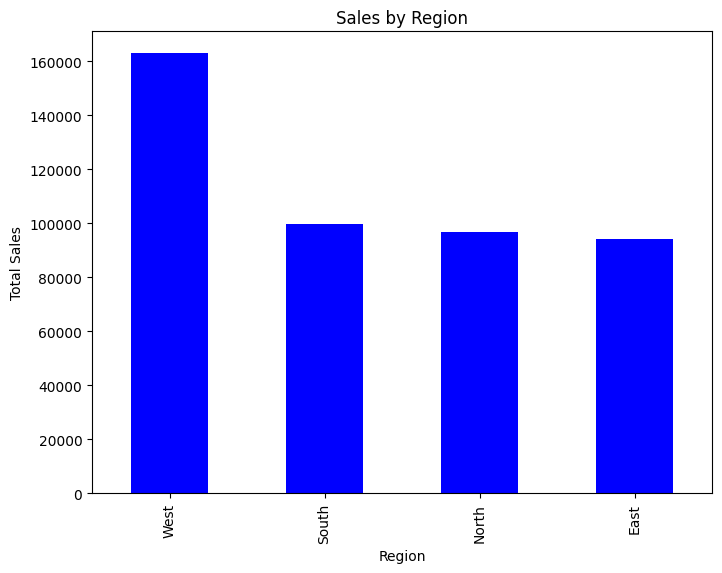

In [15]:
#Sales Region

Salecorner = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
Salecorner.plot(kind='bar', title='Sales by Region', color='blue', figsize=(8,6))
plt.ylabel('Total Sales')
plt.show()

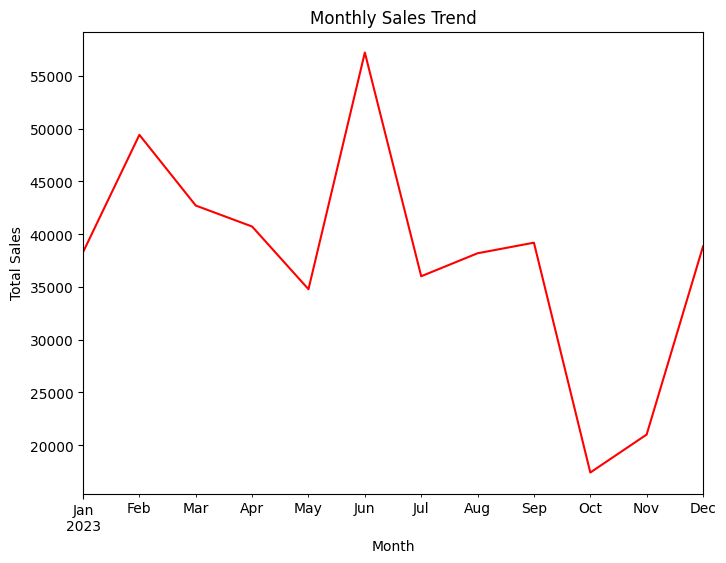

In [18]:
#Monthly Sales Trend
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend', color='red', figsize=(8,6))
plt.ylabel('Total Sales')
plt.show()

June happens to be the best month for the company, while October is the least for the company, but there is a growing strike for demand for December

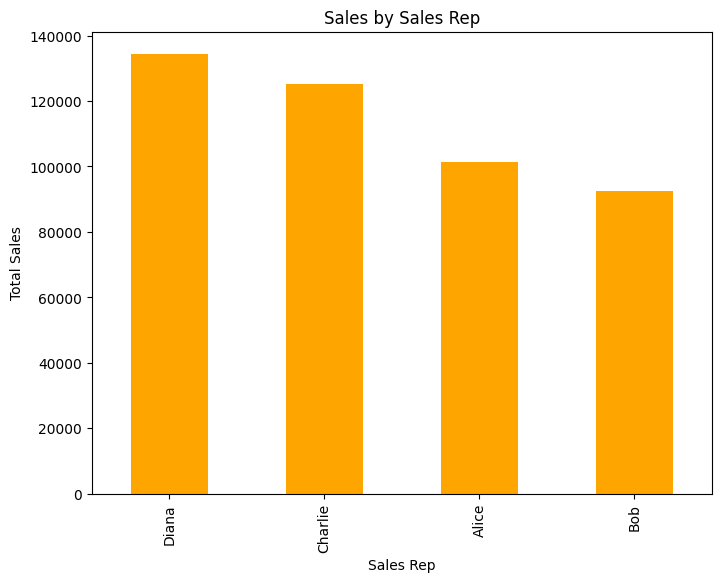

In [19]:
#Sales By Sales Rep
Sales_rep = df.groupby('Sales Rep')['Sales'].sum().sort_values(ascending=False)
Sales_rep.plot(kind='bar', title='Sales by Sales Rep', color='orange', figsize=(8,6))
plt.ylabel('Total Sales')
plt.show()

Diana Made more sales, closely followed by CHarlie
